# DBSCAN 
In this notebook, I will use DBSCAN to cluster my datasest based on top two features (Glucose and BMI).
After that I will find the percentage of having diabetes in each group.

In [1]:
#stop warning messages
import sys
import warnings


if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from itertools import cycle, islice

%matplotlib inline

In [3]:
dataset_1 = pd.read_csv('../part_02/dataset/diabetes.csv')

In [4]:
dataset_1.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [5]:
dataset_2 = dataset_1[['Glucose','BMI']]

In [6]:
dataset_2.head(2)

,Glucose,BMI
0,148,33.6
1,85,26.6


In [7]:
dataset_2.shape

(768, 2)

In [8]:
dataset_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,120.894531,31.972618,0.0,99.0,117.0,140.25,199.0
BMI,768.0,31.992578,7.884160,0.0,27.3,32.0,36.60,67.1


In [9]:
dataset_3 = dataset_1[['Glucose','BMI', 'Outcome']]
dataset_3.head(2)

,Glucose,BMI,Outcome
0,148,33.6,1
1,85,26.6,0


In [10]:
#replace missing values for Glucose
mean_Glucose = dataset_2['Glucose'].mean(skipna=True)
dataset_2['Glucose']=dataset_2.Glucose.mask(dataset_2.Glucose == 0,mean_Glucose)
dataset_3['Glucose']=dataset_3.Glucose.mask(dataset_3.Glucose == 0,mean_Glucose)

In [11]:
#replace missing values for BMI
mean_BMI = dataset_2['BMI'].mean(skipna=True)
dataset_2['BMI']=dataset_2.BMI.mask(dataset_2.BMI == 0,mean_BMI)
dataset_3['BMI']=dataset_3.BMI.mask(dataset_3.BMI == 0,mean_BMI)

In [12]:
dataset_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,121.681605,30.436016,44.0,99.75,117.0,140.25,199.0
BMI,768.0,32.450805,6.875374,18.2,27.50,32.0,36.60,67.1


In [13]:
dataset_3.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,121.681605,30.436016,44.0,99.75,117.0,140.25,199.0
BMI,768.0,32.450805,6.875374,18.2,27.50,32.0,36.60,67.1
Outcome,768.0,0.348958,0.476951,0.0,0.00,0.0,1.00,1.0


In [14]:
dataset_2 = np.array(dataset_2)

In [15]:
dataset_2[:5]

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       [ 89. ,  28.1],
       [137. ,  43.1]])

In [16]:
def plot_dataset(dataset, xlim=(0,220), ylim=(0,70)):
    plt.figure(figsize=figsize)
    plt.scatter(dataset[:,0], dataset[:,1], s=point_size, color="#00B3E9", edgecolor='black', lw=point_border)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title('People distrbuition')
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.show()

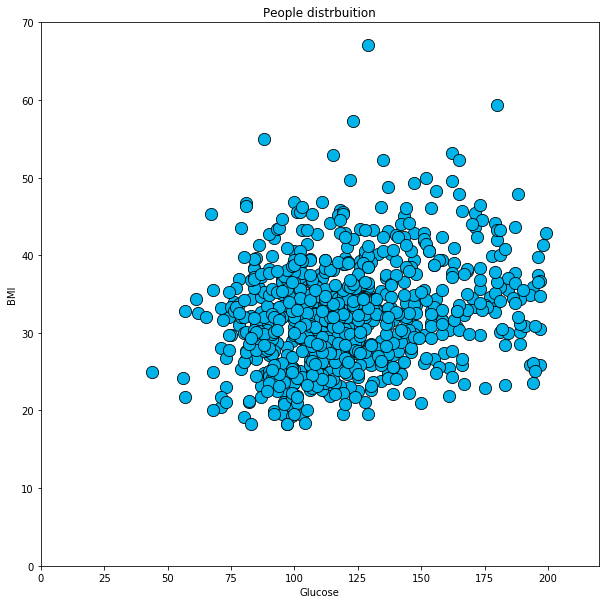

In [17]:
figsize = (10,10)
point_size=150
point_border=0.8

#plot data set that present people distruibtion using 2 featurs .... ,,  ....    
plot_dataset(dataset_2)

In [31]:

def plot_clustered_dataset(dataset, y_pred, xlim=(0, 220), ylim=(0,70), neighborhood=False, epsilon=0.5):

    fig, ax = plt.subplots(figsize=figsize)
    
    colors = np.array(list(islice(cycle(['#df8efd', '#78c465', '#ff8e34',
                                     '#f65e97', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
    colors = np.append(colors, '#BECBD6')
    
    
    if neighborhood:
        for point in dataset:
            circle1 = plt.Circle(point, epsilon, color='#666666', fill=False, zorder=0, alpha=0.3)
            ax.add_artist(circle1)

    ax.scatter(dataset[:, 0], dataset[:, 1], s=point_size, color=colors[y_pred], zorder=10, edgecolor='black', lw=point_border)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title('Groups of People')
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.show()

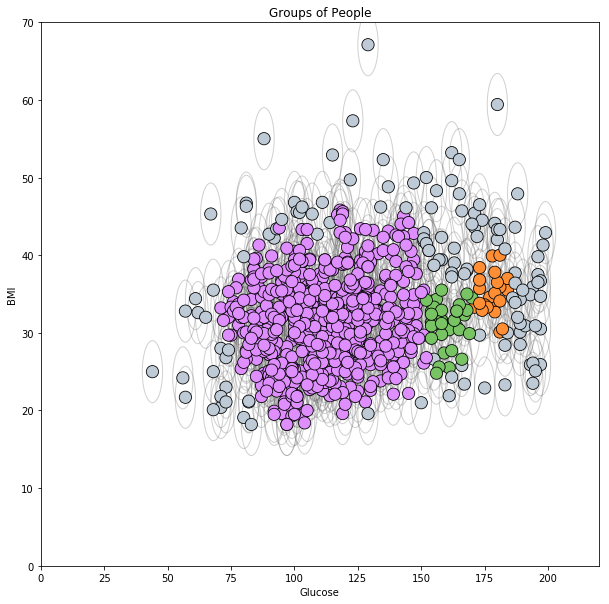

In [36]:
#Experiment with different values for eps and min_samples to find a suitable clustering for the dataset
eps=4
min_samples=10

# Cluster with DBSCAN
dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
clustering_labels_4 = dbscan.fit_predict(dataset_2)

# Plot
plot_clustered_dataset(dataset_2, 
                              clustering_labels_4, 
                              neighborhood=True, 
                              epsilon=4)



In [37]:
pd.DataFrame(clustering_labels_4,columns={'class'})['class'].value_counts()

 0    582
-1    127
 1     35
 2     24
Name: class, dtype: int64

In [38]:
pd.DataFrame(clustering_labels_4,columns={'class'})['class'].value_counts()/ len(dataset_3)

 0    0.757812
-1    0.165365
 1    0.045573
 2    0.031250
Name: class, dtype: float64

In [39]:
# pd.DataFrame(clustering_labels_4,columns={'class'})
dataset_3['class'] = pd.Series(clustering_labels_4)

In [40]:
dataset_3.groupby(['class','Outcome']).count()

Glucose  BMI
class Outcome              
-1    0             55   55
      1             72   72
 0    0            430  430
      1            152  152
 1    0             12   12
      1             23   23
 2    0              3    3
      1             21   21

In [41]:
# group 0
print(dataset_3[dataset_3['class']==0]['Glucose'].min())
print(dataset_3[dataset_3['class']==0]['Glucose'].max())

print(dataset_3[dataset_3['class']==0]['BMI'].min())
print(dataset_3[dataset_3['class']==0]['BMI'].max())


71.0
152.0
18.2
45.8


In [42]:
# group 1
print(dataset_3[dataset_3['class']==1]['Glucose'].min())
print(dataset_3[dataset_3['class']==1]['Glucose'].max())

print(dataset_3[dataset_3['class']==1]['BMI'].min())
print(dataset_3[dataset_3['class']==1]['BMI'].max())


152.0
170.0
24.8
35.5


In [43]:
# group 2
print(dataset_3[dataset_3['class']==2]['Glucose'].min())
print(dataset_3[dataset_3['class']==2]['Glucose'].max())

print(dataset_3[dataset_3['class']==2]['BMI'].min())
print(dataset_3[dataset_3['class']==0]['BMI'].max())


171.0
184.0
30.1
45.8



The following grid plots the DBSCAN clustering results of a range of parameter values. Epsilon varies horizontally, while vertically each row shows a different value of min_samples.

In [44]:
def plot_dbscan_grid(dataset, eps_values, min_samples_values):
    
    fig = plt.figure(figsize=(16, 20))
    plt.subplots_adjust(left=.02, right=.98, bottom=0.001, top=.96, wspace=.05,
                        hspace=0.25)


    plot_num = 1

    for i, min_samples in enumerate(min_samples_values):
        for j, eps in enumerate(eps_values):
            ax = fig.add_subplot( len(min_samples_values) , len(eps_values), plot_num)

            dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
            y_pred_2 = dbscan.fit_predict(dataset)

            colors = np.array(list(islice(cycle(['#df8efd', '#78c465', '#ff8e34',
                                                 '#f65e97', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(y_pred_2) + 1))))
            colors = np.append(colors, '#BECBD6')


            for point in dataset:
                circle1 = plt.Circle(point, eps, color='#666666', fill=False, zorder=0, alpha=0.3)
                ax.add_artist(circle1)

            ax.text(0, -0.03, 'Epsilon: {} \nMin_samples: {}'.format(eps, min_samples), transform=ax.transAxes, fontsize=16, va='top')
            ax.scatter(dataset[:, 0], dataset[:, 1], s=50, color=colors[y_pred_2], zorder=10, edgecolor='black', lw=0.5)


            plt.xticks(())
            plt.yticks(())
#             plt.xlim(-14, 5)
#             plt.ylim(-12, 7)

            plot_num = plot_num + 1

    plt.show()

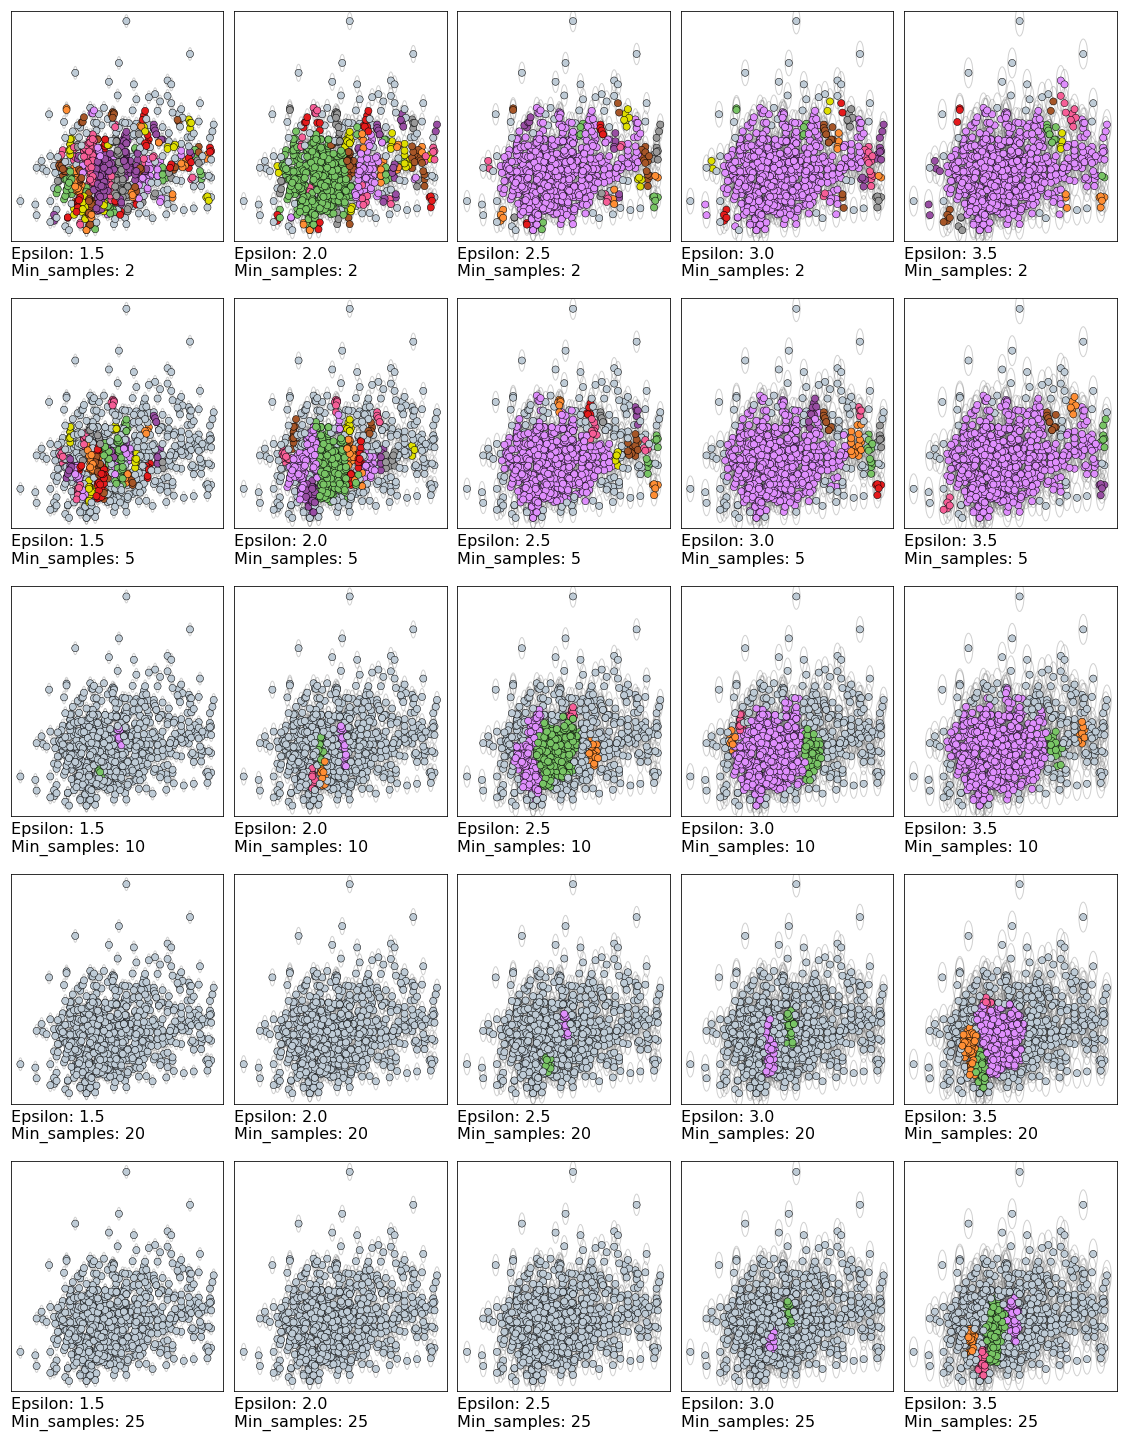

In [45]:
eps_values = [1.5, 2.0, 2.5, 3.0, 3.5]
min_samples_values = [2, 5, 10, 20, 25]

plot_dbscan_grid(dataset_2, eps_values, min_samples_values)
